In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img_1 = cv2.imread('Data/Puppy.jpg')
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
img_1.shape

(1080, 1920, 3)

In [3]:
img_2 = cv2.imread('Data/Yogesh17IITM.png')
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
img_2.shape

(411, 818, 3)

Resize Images

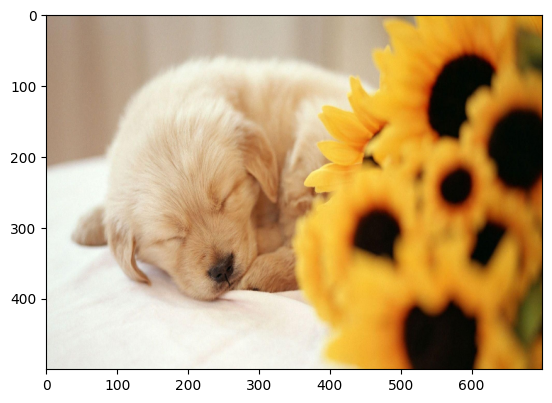

In [4]:

A_700_500 = cv2.resize(img_1, (700, 500))
plt.imshow(A_700_500)

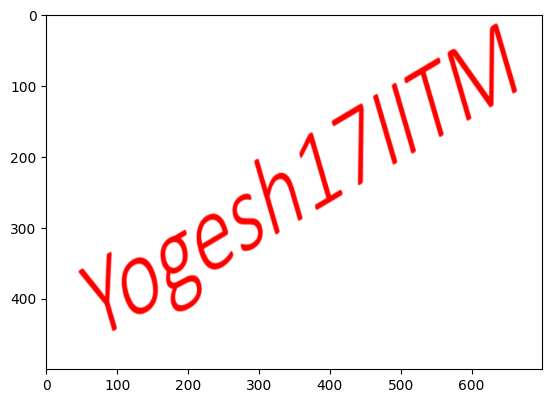

In [5]:
B_700_500 = cv2.resize(img_2, (700,500))
plt.imshow(B_700_500)

Blend the images (using addWighted)

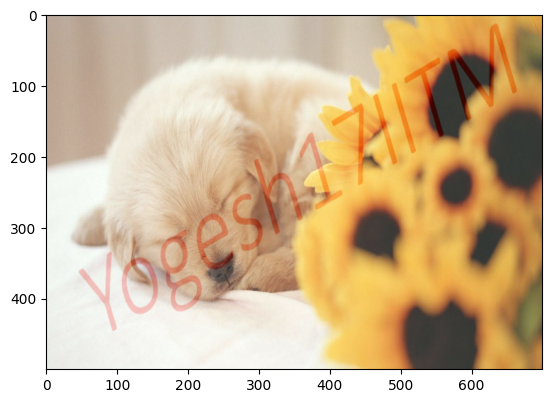

In [6]:
Blended_AB_700_500 = cv2.addWeighted(A_700_500, 0.8, B_700_500, 0.2, 0) # this will work only if the images are in same size
plt.imshow(Blended_AB_700_500)

Overlaying small image over the big image

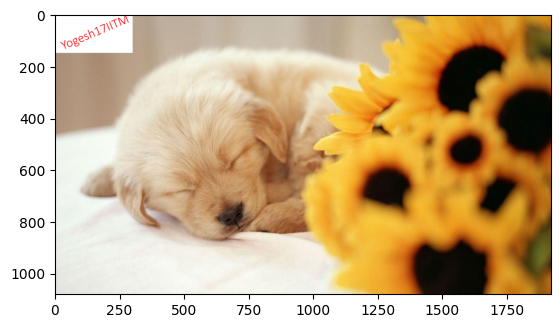

In [7]:
# Let us reload the original images
big_img = img_1.copy()
small_img = img_2.copy()
small_img = cv2.resize(small_img, (300,150))

x_start, y_start = 0,0 # start point
x_end, y_end = x_start+small_img.shape[1], y_start+small_img.shape[0] # End point = start point + no. of columns/rows

big_img[y_start:y_end,x_start:x_end] = small_img
plt.imshow(big_img)
# Hint: big_img[x or rows, y or columns], image.shape(height, width, layers)

Blending images of different sizes

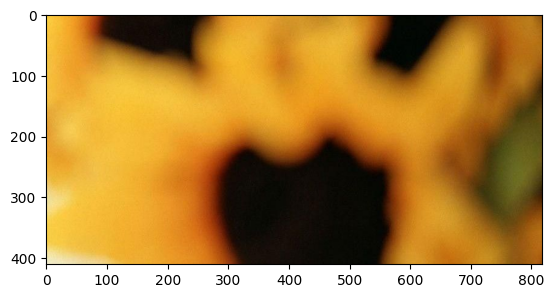

In [8]:
big_img = img_1
small_img = img_2

# Select ROI: Bottom right corner
row_b, col_b, layer_b = big_img.shape   # big image dimensions
row_s, col_s, layer_s = small_img.shape # small image dimensions

x_start = col_b - col_s
y_start = row_b - row_s

x_end = col_b
y_end = row_b
roi = big_img[y_start:y_end, x_start:x_end]

# display region of interest (in our example, bottom-right corner)
plt.imshow(roi) 

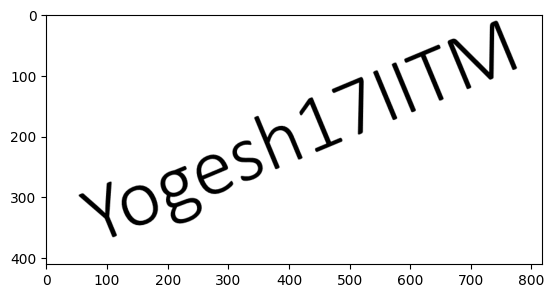

In [9]:
small_img_gray = cv2.cvtColor(small_img, cv2.COLOR_RGB2GRAY)
plt.imshow(small_img_gray, cmap='gray')
 

In [10]:
#invert the colors
mask_inv = cv2.bitwise_not(small_img_gray)
mask_inv.shape # single layer image

(411, 818)

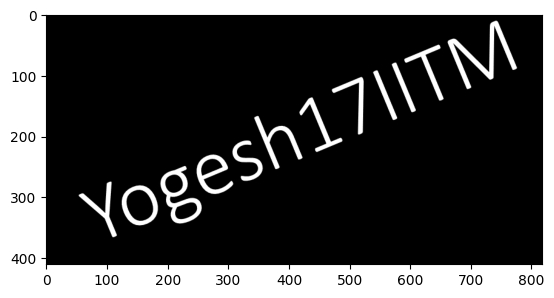

In [11]:
plt.imshow(mask_inv, cmap='gray')

In [12]:
import numpy as np
white_background = np.full(img_2.shape, 255, dtype=np.uint8)
background = cv2.bitwise_or(white_background, white_background, mask=mask_inv)
background.shape # converted into 3 layer image

(411, 818, 3)

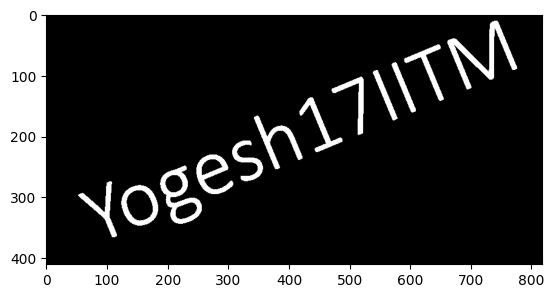

In [13]:
plt.imshow(background)

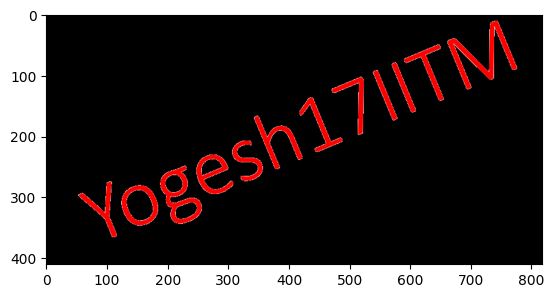

In [14]:
foreground = cv2.bitwise_or(img_2, img_2, mask=mask_inv)
plt.imshow(foreground)

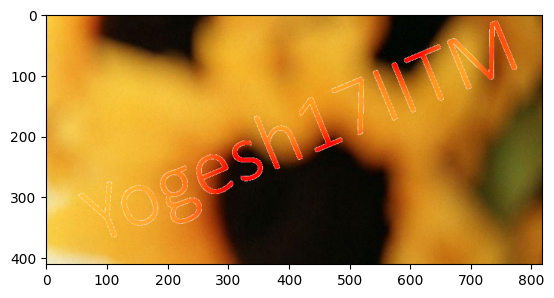

In [15]:
final_roi = cv2.bitwise_or(roi, foreground)
plt.imshow(final_roi)

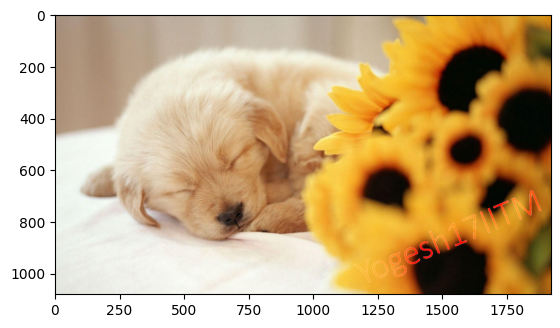

In [16]:
small_img = final_roi
big_img[y_start:y_start+small_img.shape[0], x_start:x_start+small_img.shape[1]] = small_img
plt.imshow(big_img)